### **Recomendation system MODISTA - Provides outfits according to your fashion**
Dataset:
https://www.kaggle.com/datasets/ishanshrivastava28/sales-transaction-dataset-with-product-details

Referensi :
https://www.kaggle.com/code/ahmedmgelwan/e-commerce-prediction-using-ann-by-tensorflow#Top-10-words-in-descroptions

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
pip install tensorflow keras

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
# df = pd.read_csv('/content/drive/My Drive/Sales_Product_Details.csv')
url = 'https://drive.google.com/file/d/1VsaQ0zYcAARmu11GIkCCUm32L_d0Mkok/view?usp=sharing'

# Mengambil ID file dari tautan
file_id = url.split('/')[-2]

# Membuat tautan langsung ke file CSV
download_url = 'https://drive.google.com/uc?id=' + file_id

# Membaca file CSV dari tautan
df = pd.read_csv(download_url)

df = df[df['Product_Description'] != 'Pyjamas']

In [5]:

# Data cleaning and preprocessing
df = df[df['Product_Description'] != 'Pyjamas']
df.drop(columns=['Customer_ID', 'Sales_Revenue', 'Product_Category', 'Product_Line', 'Raw_Material', 'Latitude', 'Longitude'], inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d').dt.strftime('%Y-%m-%d')
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [6]:
df = pd.read_csv(download_url,encoding='unicode_escape') # used `unicode_escape` to handel encoding
df

Date  Customer_ID  Product_ID  Quantity  Unit_Price  Sales_Revenue  \
0     20240206           40         360        10       37.70         377.00   
1     20230630           17         391         5       89.26         446.30   
2     20240311            2         329        10       61.05         610.50   
3     20240131           36         321         5       41.68         208.40   
4     20240517            3         368         4       29.60         118.40   
...        ...          ...         ...       ...         ...            ...   
4995  20240305           64         278         6       87.43         524.58   
4996  20240425           55         235         9       28.51         256.59   
4997  20230812            8         370         5       23.76         118.80   
4998  20240516           41         290         8       78.44         627.52   
4999  20240228           45         255        10       21.80         218.00   

     Product_Description Product_Category Product_Line Raw_Material  \
0            Polo Shirts       Womenswear     Trousers      Fabrics   
1                Tshirts      Accessories        Shoes         Wool   
2                   Ties         Menswear         Tops      Leather   
3          Casual Shirts       Womenswear        Shoes     Cashmere   
4                Pyjamas       Womenswear     Leathers    Polyester   
...                  ...              ...          ...          ...   
4995         Polo Shirts       Womenswear        Shoes      Fabrics   
4996                Ties           Sports     Leathers    Polyester   
4997       Casual Shirts         Menswear        Shoes      Leather   
4998            Knitwear         Menswear     Trousers    Polyester   
4999               Pants         Menswear     Trousers         Wool   

          Region   Latitude   Longitude  
0      Worcester  40.885497   73.661005  
1          Truro  60.438329   98.422007  
2          Wells   6.882673  -81.830803  
3          Truro -84.576955  131.171699  
4     Winchester  61.287203 -158.397984  
...          ...        ...         ...  
4995        York  12.705542   -2.975480  
4996        York  70.863733   69.521578  
4997  Winchester  46.513581   90.610376  
4998        York  60.779195  159.432552  
4999   Wakefield -74.064709 -101.517567  

[5000 rows x 13 columns]

In [7]:
# Feature engineering
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['DayOfMonth'] = pd.to_datetime(df['Date']).dt.day
df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.dayofweek

In [8]:
# Encoding categorical variables
encoder = LabelEncoder()
df['Region'] = encoder.fit_transform(df['Region'])
df['Product_ID'] = df['Product_ID'].astype(str)

In [9]:
# Filter data based on criteria (adjust this based on your specific requirements)
# Example: Keep top countries and top stocks
top_countries = df['Region'].value_counts().head(10).index.to_list()
top_stocks = df['Product_ID'].value_counts().head(50).index.to_list()
df_ = df[(df['Region'].isin(top_countries)) & (df['Product_ID'].isin(top_stocks))]


In [10]:
# Check if there are enough samples for train-test split
if len(df_) < 2:  # Adjust this threshold as needed
    raise ValueError("Not enough samples remaining after preprocessing. Adjust your preprocessing steps or criteria.")

X = df_.drop(columns=['Quantity', 'Product_Description', 'Date'])
y = df_['Quantity']

In [11]:

# Ensure target variable 'y' is suitable for classification
y = encoder.fit_transform(y)

# Reshape y to ensure it is one-dimensional
y = y.reshape(-1)

# Make sure label values are in the correct range
num_classes = len(np.unique(y))
if np.max(y) >= num_classes:
    raise ValueError(f"Label values should be in the range [0, {num_classes-1}]. Found label {np.max(y)}.")

X = pd.get_dummies(X, columns=X.select_dtypes('object').columns, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# prompt: perbesar parameter layernya

model = tf.keras.Sequential([
    tf.keras.layers.Dense(132, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16),
    # tf.keras.layers.Dropout(0.2),
    # tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [15]:
# Model compilation
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  # Metric for accuracy


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 132)               9240      
                                                                 
 dropout (Dropout)           (None, 132)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4256      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                2

In [17]:

# Callback for early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, callbacks=[callback])


Epoch 1/100
40/40 [==============================] - 3s 20ms/step - loss: 2.4047 - accuracy: 0.1004 - val_loss: 2.3098 - val_accuracy: 0.0987
Epoch 2/100
40/40 [==============================] - 0s 8ms/step - loss: 2.3140 - accuracy: 0.1211 - val_loss: 2.3085 - val_accuracy: 0.0924
Epoch 3/100
40/40 [==============================] - 0s 8ms/step - loss: 2.2827 - accuracy: 0.1243 - val_loss: 2.3090 - val_accuracy: 0.1146
Epoch 4/100
40/40 [==============================] - 0s 7ms/step - loss: 2.2660 - accuracy: 0.1291 - val_loss: 2.3043 - val_accuracy: 0.0955
Epoch 5/100
40/40 [==============================] - 0s 7ms/step - loss: 2.2472 - accuracy: 0.1673 - val_loss: 2.2800 - val_accuracy: 0.1019
Epoch 6/100
40/40 [==============================] - 0s 9ms/step - loss: 2.1969 - accuracy: 0.1904 - val_loss: 2.2381 - val_accuracy: 0.1242
Epoch 7/100
40/40 [==============================] - 0s 8ms/step - loss: 2.1277 - accuracy: 0.2143 - val_loss: 2.1743 - val_accuracy: 0.1369
Epoch 8/100


In [18]:

# Evaluating the model
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=-1)  # Convert probabilities to class labels
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


10/10 [==============================] - 0s 3ms/step
Accuracy: 0.7707006369426752


In [19]:
# preds = model.predict(X_test_scaled)
y_pred_probs

array([[1.6784251e-11, 2.1083655e-09, 4.6272950e-07, ..., 7.6968427e-05,
        4.5365032e-06, 2.7294820e-07],
       [7.1530801e-04, 1.9145584e-02, 1.4124812e-01, ..., 2.5498251e-11,
        1.0090549e-13, 2.3410157e-15],
       [2.8773246e-02, 1.9095275e-01, 7.5655705e-01, ..., 1.2842503e-10,
        4.7872871e-13, 3.0552079e-14],
       ...,
       [1.7184378e-17, 2.9915232e-17, 1.3721851e-12, ..., 1.6743846e-01,
        4.6825653e-01, 3.3699217e-01],
       [4.7982424e-01, 4.4859609e-01, 7.1558915e-02, ..., 3.6964747e-20,
        6.5852141e-25, 3.9609033e-26],
       [2.3045230e-01, 7.4814659e-01, 2.1400841e-02, ..., 7.2971676e-35,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

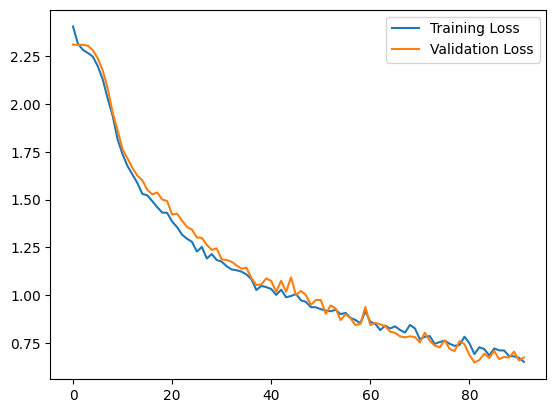

In [20]:

# Optional: Plot loss and metrics over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [21]:
# Creating a result DataFrame
result = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Prediction': y_pred.flatten()
    # 'Prediction': np.round(y_pred[:, 0, 0]).astype(int)

    })

In [22]:
result

Actual  Prediction
0         5           5
1         3           3
2         1           2
3         0           0
4         0           0
..      ...         ...
309       6           6
310       2           3
311       8           8
312       1           0
313       1           1

[314 rows x 2 columns]

In [24]:
# Calculate R^2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

R^2 Score: 0.9647179684741083


Making a Recomender System

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
# model = tf.keras.models.load_model('recomender_model.h5')

# Get the user's input
user_input = input('Enter a Product : ')

# Function to get the product index based on different input types
def get_product_index(user_input):
    if user_input.isdigit():  # Check if the input is all digits (assuming Product_IDs are numeric)
        # Check if the Product_ID exists in the DataFrame
        if int(user_input) in df_['Product_ID'].values:
            return df_.loc[df_['Product_ID'] == int(user_input)].index[0]
        else:
            print("Product ID not found. Please enter a valid Product ID.")
            return None
    elif user_input in df_['Product_Description'].values:
        # Check if the Product_Description exists in the DataFrame
        return df_.loc[df_['Product_Description'] == user_input].index[0]
    elif user_input in df_['Product_Category'].values:
        # Check if the Product_Category exists in the DataFrame
        return df_.loc[df_['Product_Category'] == user_input].index[0]
    elif user_input in df_['Product_Line'].values:
        # Check if the Product_Line exists in the DataFrame
        return df_.loc[df_['Product_Line'] == user_input].index[0]
    elif user_input in df_['Raw_Material'].values:
        # Check if the Raw_Material exists in the DataFrame
        return df_.loc[df_['Raw_Material'] == user_input].index[0]
    elif user_input in df_['Unit_Price'].values:
        # Check if the Unit_Price exists in the DataFrame
        return df_.loc[df_['Unit_Price'] == user_input].index[0]
    else:
        print("Product not found. Please enter a valid product information.")
        return None

# Get the product index
# product_index = get_product_index(user_input)
product_index = get_product_index(user_input)

# Check if the product index is found
if product_index is not None:
    # Calculate the cosine similarity between the user's input product and all other products
    similarity_scores = cosine_similarity([X_train_scaled[product_index]], X_train_scaled)[0]

    # Get the indices of the top 10 most similar products
    top_10_indices = np.argsort(similarity_scores)[::-1][1:11]  # Exclude the input product itself

    # Create a DataFrame of the top 10 most similar products
    recommended_products = pd.DataFrame({
        'Product_ID': df_.iloc[top_10_indices]['Product_ID'].values,
        'Product_Description': df_.iloc[top_10_indices]['Product_Description'].values,
        'Product_Category': df_.iloc[top_10_indices]['Product_Category'].values,
        'Product_Line': df_.iloc[top_10_indices]['Product_Line'].values,
        'Raw_Material': df_.iloc[top_10_indices]['Raw_Material'].values,
        'Unit_Price': df_.iloc[top_10_indices]['Unit_Price'].values,
        'Similarity Score': similarity_scores[top_10_indices]
    })

    # Display the recommended products
    print(recommended_products)
else:
    print("No recommendations available. Please enter a valid product.")



Enter a Product : Wool
  Product_ID Product_Description Product_Category Product_Line Raw_Material  \
0        341              Sweats           Sports     Trousers       Cotton   
1        264       Formal Shirts      Accessories        Shoes      Fabrics   
2        359             Pyjamas       Womenswear         Tops         Wool   
3        246               Suits           Sports     Leathers    Polyester   
4        261              Shorts       Womenswear         Tops      Fabrics   
5        213       Formal Shirts         Menswear     Leathers         Wool   
6        282               Pants         Menswear        Shoes       Cotton   
7        337         Polo Shirts      Accessories         Tops      Fabrics   
8        276       Casual Shirts           Sports     Trousers    Polyester   
9        220       Casual Shirts       Womenswear     Leathers         Wool   

   Unit_Price  Similarity Score  
0       43.74          0.848748  
1       43.00          0.792129  
2    

Training dan Saving Model


In [26]:
# Save the TensorFlow model as model.h5
model.save('recomender_model.h5')

In [27]:
# prompt: bagaimana cara menyimpan X_train_scaled

import pickle

# Save the scaled training data using pickle
with open('X_train_scaled.pkl', 'wb') as f:
    pickle.dump(X_train_scaled, f)
